# Making R dplyr syntax similar to pandas in Python

**The main objective of this project is to write a class pd that would make dplyr syntax similar to pandas package in Python. The class should enable to use all constructions offered in the dplyr package.**

To accomplish that task the R6 model was used.

## Table of contents

<div class="toc">
	<ul class="toc-item">
		<li>
			<span>
				<a href="#Implementation" data-toc-modified-id="Implementation">
					<span class="toc-item-num">1.&nbsp;&nbsp;</span>Implementation
				</a>
			</span>
		</li>
		<li>
			<span>
				<a href="#Examples" data-toc-modified-id="Examples">
					<span class="toc-item-num">2.&nbsp;&nbsp;</span>Examples
				</a>
			</span>
		</li>
	</ul>
</div>

## Implementation

In [12]:
library(R6)
library(dplyr)
library(ggplot2)

fileURL <- "data/Cars.csv"

pd <- R6Class(classname = "pd",
                 public = list(
                   initialize = function(data){
                     private$data = data
                     private$data_copy = data
                   },
                   value = function() {
                     private$data
                   },
                   convert = function(){
                     if(class(self$value())[1] == "tbl_df"){
                       private$data <- as.data.frame(private$data)
                     } else {
                       private$data <- as_tibble(private$data)
                     }
                   },
                   op = function(arg){
                     private$data <- eval(substitute(private$data %>% arg))
                     invisible(self)
                   },
                   reset = function(){
                     private$data <- private$data_copy
                   }
                   ),
                    private = list(
                      data = NA,
                      data_copy = NA
                    ))

print.pd <- function(object){
  print(object$value())
}

## Examples

In [21]:
# Creating a pd object
a <- pd$new(data = read.csv(file = fileURL))

In [22]:
# Changing the class of a data set
class(a$value())
a$convert()
class(a$value())
a$convert()

[1] "data.frame"

[1] "tbl_df"     "tbl"        "data.frame"

In [23]:
head(a$value())

Year_prod,Gas_type,Engine_capacity,Mileage,Price,Brand,Model,Voivodeship,City,Negotiation
2005,Diesel,2500,280000,20990,Audi,A4 B7,Dolnośląskie,Wałbrzych,0
2009,Diesel,2200,170000,38000,Honda,Accord VIII,Mazowieckie,Płock,1
2011,Diesel,1600,96000,22600,Volkswagen,Polo V,Śląskie,Żory,0
2004,Benzyna+LPG,2494,198230,15000,BMW,Seria 3 E46,Mazowieckie,Warszawa,1
2006,Diesel,2000,256000,16900,Volkswagen,Passat B6,Śląskie,Bytom,1
2012,Benzyna,4000,67000,140000,Toyota,Land Cruiser VI,Lubuskie,Kostrzynnad Odrą,1


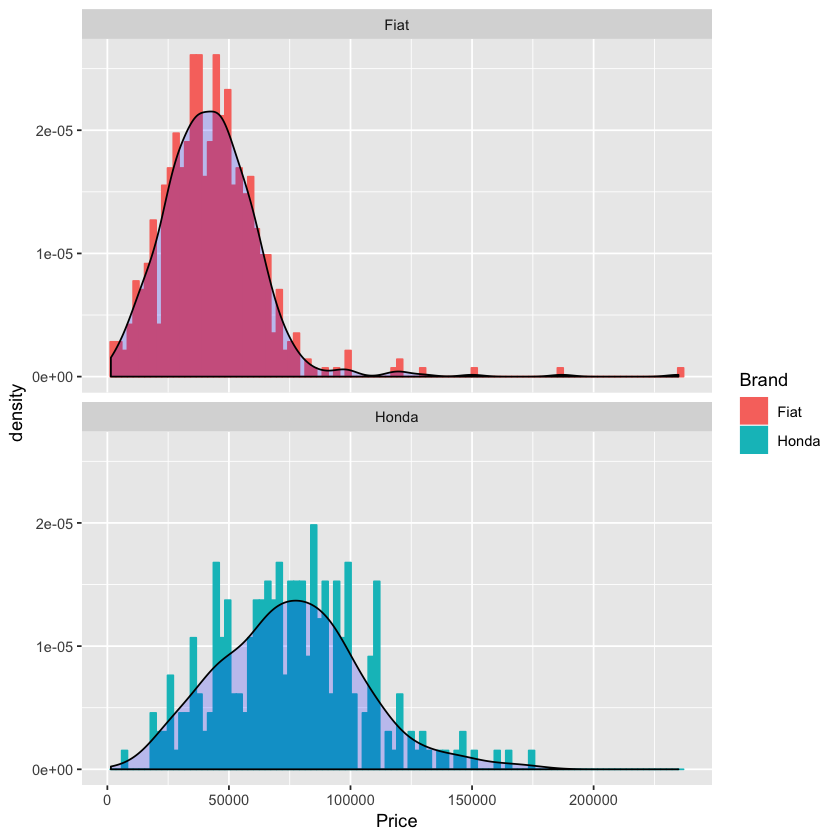

In [24]:
# Data operations
a$op(select(Mileage, Price, Brand))
a$op(filter(Mileage < 50000))
a$op(filter(Brand %in% c("Honda", "Fiat")))

# Creating a simple figure
ggplot(data = (a$value()), mapping = aes(x = Price)) +
  geom_histogram(bins = 100, aes(fill = Brand, color = Brand, y = ..density..)) +
  geom_density(fill = "blue", alpha = 0.2) + 
  facet_wrap(~ Brand, nrow = 2)

# Reseting the data set
a$reset()

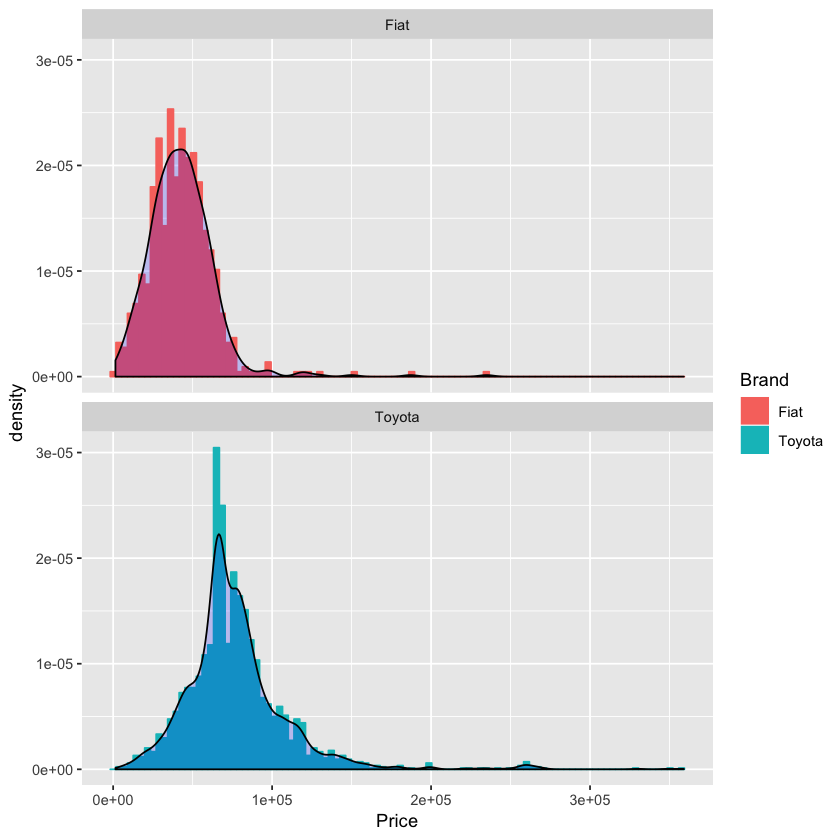

In [25]:
# Chaining dplyr commands
a$op(select(Mileage, Price, Brand))$op(filter(Mileage < 50000))$op(filter(Brand %in% c("Toyota", "Fiat")))

# Creating a simple figure
ggplot(data = (a$value()), mapping = aes(x = Price)) +
  geom_histogram(bins = 100, aes(fill = Brand, color = Brand, y = ..density..)) +
  geom_density(fill = "blue", alpha = 0.2) + 
  facet_wrap(~ Brand, nrow = 2)

# Reseting the data set
a$reset()

In [26]:
# Computations
a$op(select(Brand, Mileage, Price))$op(filter(Price <= 500))
a$op(arrange(Brand, desc(Price)))

# Print method
a

   Brand Mileage Price
1 Daewoo  309376   500
2   Fiat  145500   400
3   Opel  296000   500
4 Toyota  260000   500
5 Toyota  312415   450